In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from matplotlib import rc


ee_df = pd.read_excel('WDIW Dataset_Team 2.xlsx',sheet_name=1)
ee_df.head()



,Country Code,Country Name,Hult Region,Cool Name,"Access to electricity, urban (% of urban population)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Agriculture, forestry, and fishing, value added (% of GDP)",Armed forces personnel (% of total labor force),"Birth rate, crude (per 1,000 people)",...,"Population, total",poverty headcount ratio(% of population),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),Rural population (% of total population),"Services, value added (% of GDP)",Surface area (sq. km),Tax revenue (% of GDP),Urban population (% of total population),Urban population growth (annual %)
0,SVN,Slovenia,Eastern Europe,Skids & Mudflap,100,3.776,51.344338,1.711556,0.680917,9.8,...,2066388,0.143,0.1,2.5,45.727,56.671521,20675.000000,18.437426,54.273,0.532404
1,CZE,Czech Republic,Eastern Europe,Skids & Mudflap,100,11.972,52.397391,2.057569,0.424439,10.8,...,10594438,9.7 %,0.1,2.5,26.325,54.460285,78870.000000,14.877358,73.675,0.408265
2,SVK,Slovakia,Eastern Europe,Skids & Mudflap,100,25.684,43.716890,3.095256,0.579305,10.7,...,5439232,12.6 %,0.1,3.4,46.249,55.559647,49030.000000,17.744886,53.751,0.052927
3,FIN,Finland,Eastern Europe,Skids & Mudflap,100,5.813,60.076618,2.340589,0.922622,9.1,...,5508214,0.30 %,0.1,2.5,14.675,59.620039,338450.000000,20.937129,85.325,0.293288
4,NOR,Norway,Eastern Europe,Skids & Mudflap,100,5.141,52.683567,1.928860,0.832511,10.7,...,5276968,0.20 %,0.1,2.5,18.129,57.466154,625217.109375,22.478309,81.871,1.280246


In [2]:
ee_df.describe().round(1)

,"Access to electricity, urban (% of urban population)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Agriculture, forestry, and fishing, value added (% of GDP)",Armed forces personnel (% of total labor force),"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),...,"Population, male","Population, total","Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),Rural population (% of total population),"Services, value added (% of GDP)",Surface area (sq. km),Tax revenue (% of GDP),Urban population (% of total population),Urban population growth (annual %)
count,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
mean,100.0,12.1,50.9,4.6,1.2,10.5,10.7,8.5,26.1,65.0,...,3074831.2,6296094.2,0.2,3.1,33.6,58.1,127404.8,21.1,66.4,0.4
std,0.0,6.2,4.9,4.1,1.1,1.8,2.4,8.6,6.7,9.9,...,3972894.3,8187841.1,0.2,1.3,14.2,6.8,168553.3,4.0,14.2,0.9
min,100.0,3.8,42.7,0.8,0.0,8.2,7.0,1.0,15.4,42.4,...,234531.0,467999.0,0.1,2.5,5.5,45.8,320.0,14.9,38.4,-1.2
25%,100.0,7.6,47.8,2.3,0.7,9.2,9.6,2.8,19.7,58.9,...,1003822.5,2035353.0,0.1,2.5,25.1,55.1,27990.0,18.3,56.5,-0.2
50%,100.0,10.7,51.5,3.2,0.9,10.6,10.5,6.2,25.9,65.0,...,1813433.0,3738029.0,0.1,2.5,33.0,57.1,60540.0,20.6,67.0,0.3
75%,100.0,15.8,53.2,5.7,1.0,10.8,12.1,10.7,30.8,72.9,...,3744061.8,7712635.0,0.1,3.0,43.5,60.1,102762.5,23.3,74.9,0.7
max,100.0,25.7,60.1,19.0,4.6,16.4,14.8,38.2,38.1,80.0,...,18408912.0,37974826.0,0.9,6.2,61.6,75.7,625217.1,29.0,94.5,2.8


In [3]:
ee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 42 columns):
Country Code                                                                20 non-null object
Country Name                                                                20 non-null object
Hult Region                                                                 20 non-null object
Cool Name                                                                   20 non-null object
Access to electricity, urban (% of urban population)                        20 non-null int64
Adolescent fertility rate (births per 1,000 women ages 15-19)               20 non-null float64
Age dependency ratio (% of working-age population)                          20 non-null float64
Agriculture, forestry, and fishing, value added (% of GDP)                  20 non-null float64
Armed forces personnel (% of total labor force)                             20 non-null float64
Birth rate, crude (per 1,000 people)   

In [4]:
#Total GDP Eastern Europe
total_GDP = ee_df['GDP (current US$)'].sum().round(0)
f"{total_GDP:,}"

'2,687,779,370,394.0'

In [5]:
#Percentage GDP per country
GDP_share = 100*ee_df['GDP (current US$)'].round(0)/ee_df['GDP (current US$)'].sum().round(0)
GDP_share

0      1.802824
1      8.033157
2      3.557497
3      9.388090
4     14.863158
5      0.268912
6      0.484603
7     19.927506
8      0.474325
9      5.199874
10     2.053793
11    19.583863
12     0.180245
13     0.990098
14     0.672679
15     0.419659
16     1.133400
17     7.555886
18     1.768912
19     1.641520
Name: GDP (current US$), dtype: float64

In [6]:
#Country codes
c_codes_df = ee_df.loc[:,['Country Code']]

In [7]:
#Combine country codes with GDP share and sort
GDP_share_complete = pd.concat([c_codes_df,GDP_share], axis=1, join='inner')
GDP_share_complete.sort_values(by=['GDP (current US$)'])

,Country Code,GDP (current US$)
12,MNE,0.180245
5,XKX,0.268912
15,MKD,0.419659
8,MLT,0.474325
6,ALB,0.484603
14,BIH,0.672679
13,EST,0.990098
16,LVA,1.133400
19,SRB,1.641520
18,LTU,1.768912


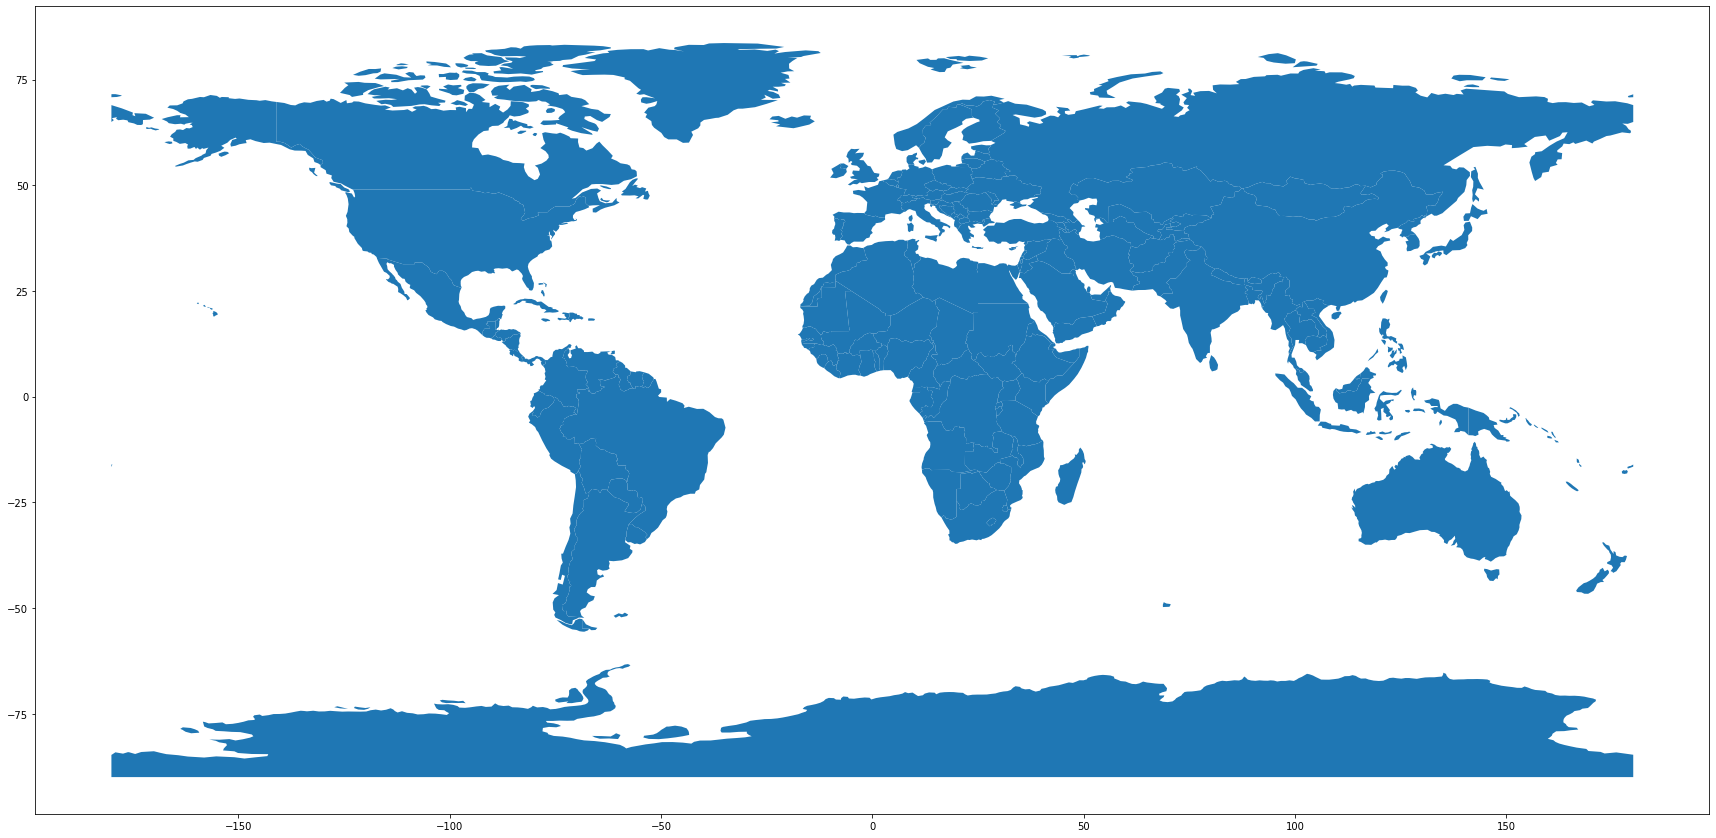

In [8]:
%matplotlib inline
import pandas as pd
import geopandas
from descartes.patch import PolygonPatch
world_map = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world_map.plot(figsize=(30,30))
plt.savefig("world_map.png")

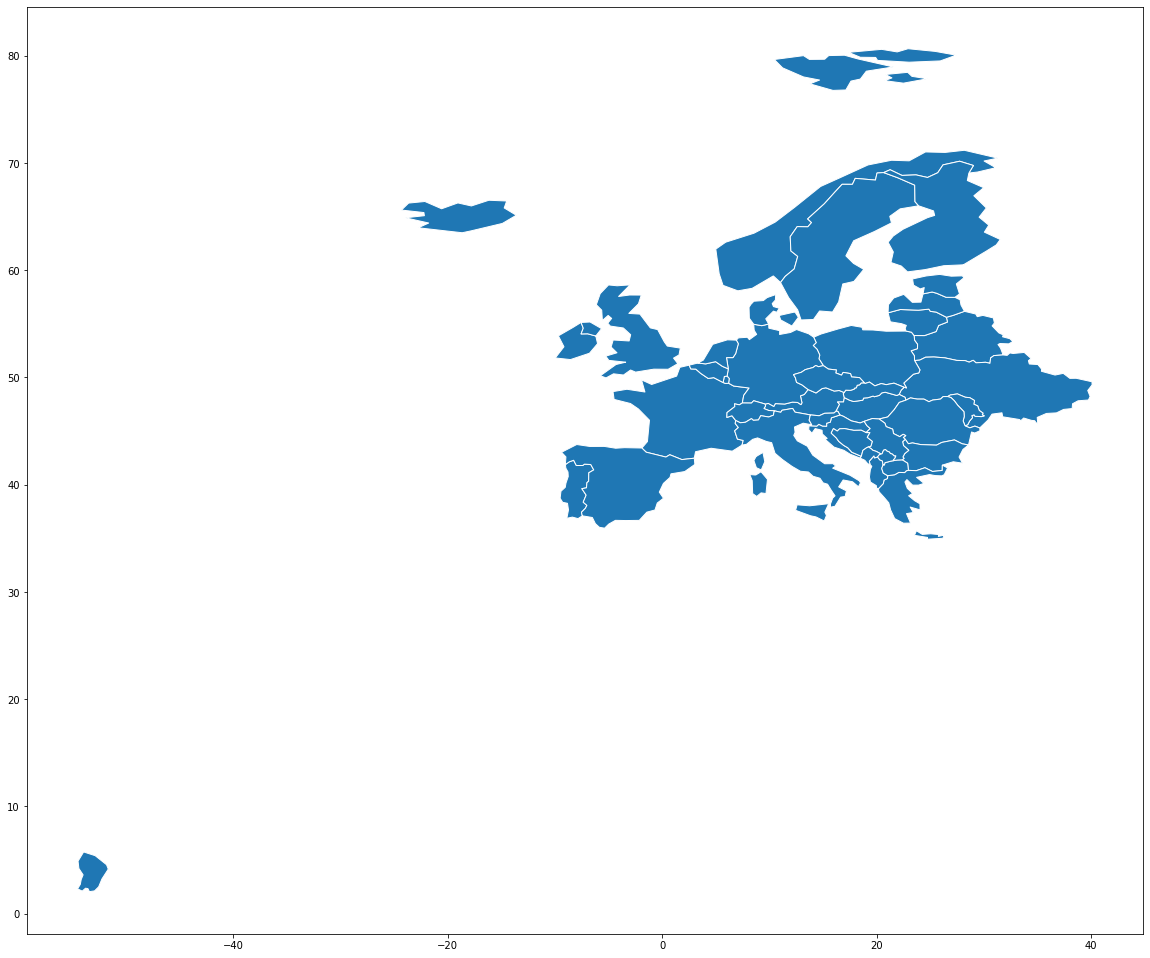

In [9]:
europe_map = world_map[(world_map.continent=="Europe")&(world_map.name!="Russia")]
europe_map.plot(figsize=(20,20), alpha=1, edgecolor='w')
plt.savefig("europe_map.png")

In [10]:
europe_map

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
21,5320045,Europe,Norway,-99,364700.0,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80..."
43,67106161,Europe,France,-99,2699000.0,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3..."
110,9960487,Europe,Sweden,SWE,498100.0,"POLYGON ((11.02737 58.85615, 11.46827 59.43239..."
111,9549747,Europe,Belarus,BLR,165400.0,"POLYGON ((28.17671 56.16913, 29.22951 55.91834..."
112,44033874,Europe,Ukraine,UKR,352600.0,"POLYGON ((31.78599 52.10168, 32.15944 52.06125..."
113,38476269,Europe,Poland,POL,1052000.0,"POLYGON ((23.48413 53.91250, 23.52754 53.47012..."
114,8754413,Europe,Austria,AUT,416600.0,"POLYGON ((16.97967 48.12350, 16.90375 47.71487..."
115,9850845,Europe,Hungary,HUN,267600.0,"POLYGON ((22.08561 48.42226, 22.64082 48.15024..."
116,3474121,Europe,Moldova,MDA,18540.0,"POLYGON ((26.61934 48.22073, 26.85782 48.36821..."
117,21529967,Europe,Romania,ROU,441000.0,"POLYGON ((28.23355 45.48828, 28.67978 45.30403..."


In [14]:
#Visualize ee_map dataframe after exclusion of countries
ee_map = europe_map.drop([43,111,112,114,116,117,121,122,127,128,129,130,131,132,133,141,142,143,144])
ee_map

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
21,5320045,Europe,Norway,-99,364700.0,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80..."
110,9960487,Europe,Sweden,SWE,498100.0,"POLYGON ((11.02737 58.85615, 11.46827 59.43239..."
113,38476269,Europe,Poland,POL,1052000.0,"POLYGON ((23.48413 53.91250, 23.52754 53.47012..."
115,9850845,Europe,Hungary,HUN,267600.0,"POLYGON ((22.08561 48.42226, 22.64082 48.15024..."
118,2823859,Europe,Lithuania,LTU,85620.0,"POLYGON ((26.49433 55.61511, 26.58828 55.16718..."
119,1944643,Europe,Latvia,LVA,50650.0,"POLYGON ((27.28818 57.47453, 27.77002 57.24426..."
120,1251581,Europe,Estonia,EST,38700.0,"POLYGON ((27.98113 59.47537, 27.98112 59.47537..."
123,10768477,Europe,Greece,GRC,290500.0,"MULTIPOLYGON (((26.29000 35.29999, 26.16500 35..."
125,3047987,Europe,Albania,ALB,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
126,4292095,Europe,Croatia,HRV,94240.0,"POLYGON ((16.56481 46.50375, 16.88252 46.38063..."


In [15]:
len(ee_map)

19

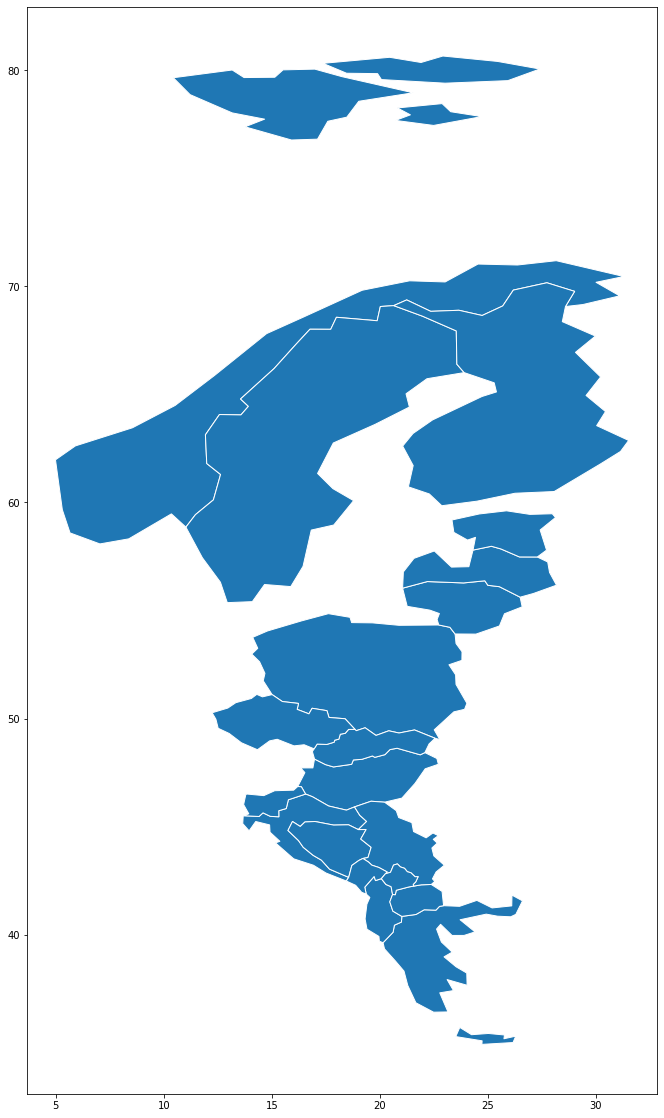

In [16]:
ee_map.plot(figsize=(20,20), alpha=1, edgecolor='w')
plt.savefig("eastern_europe_map.png")

# How EE countries are connected economically

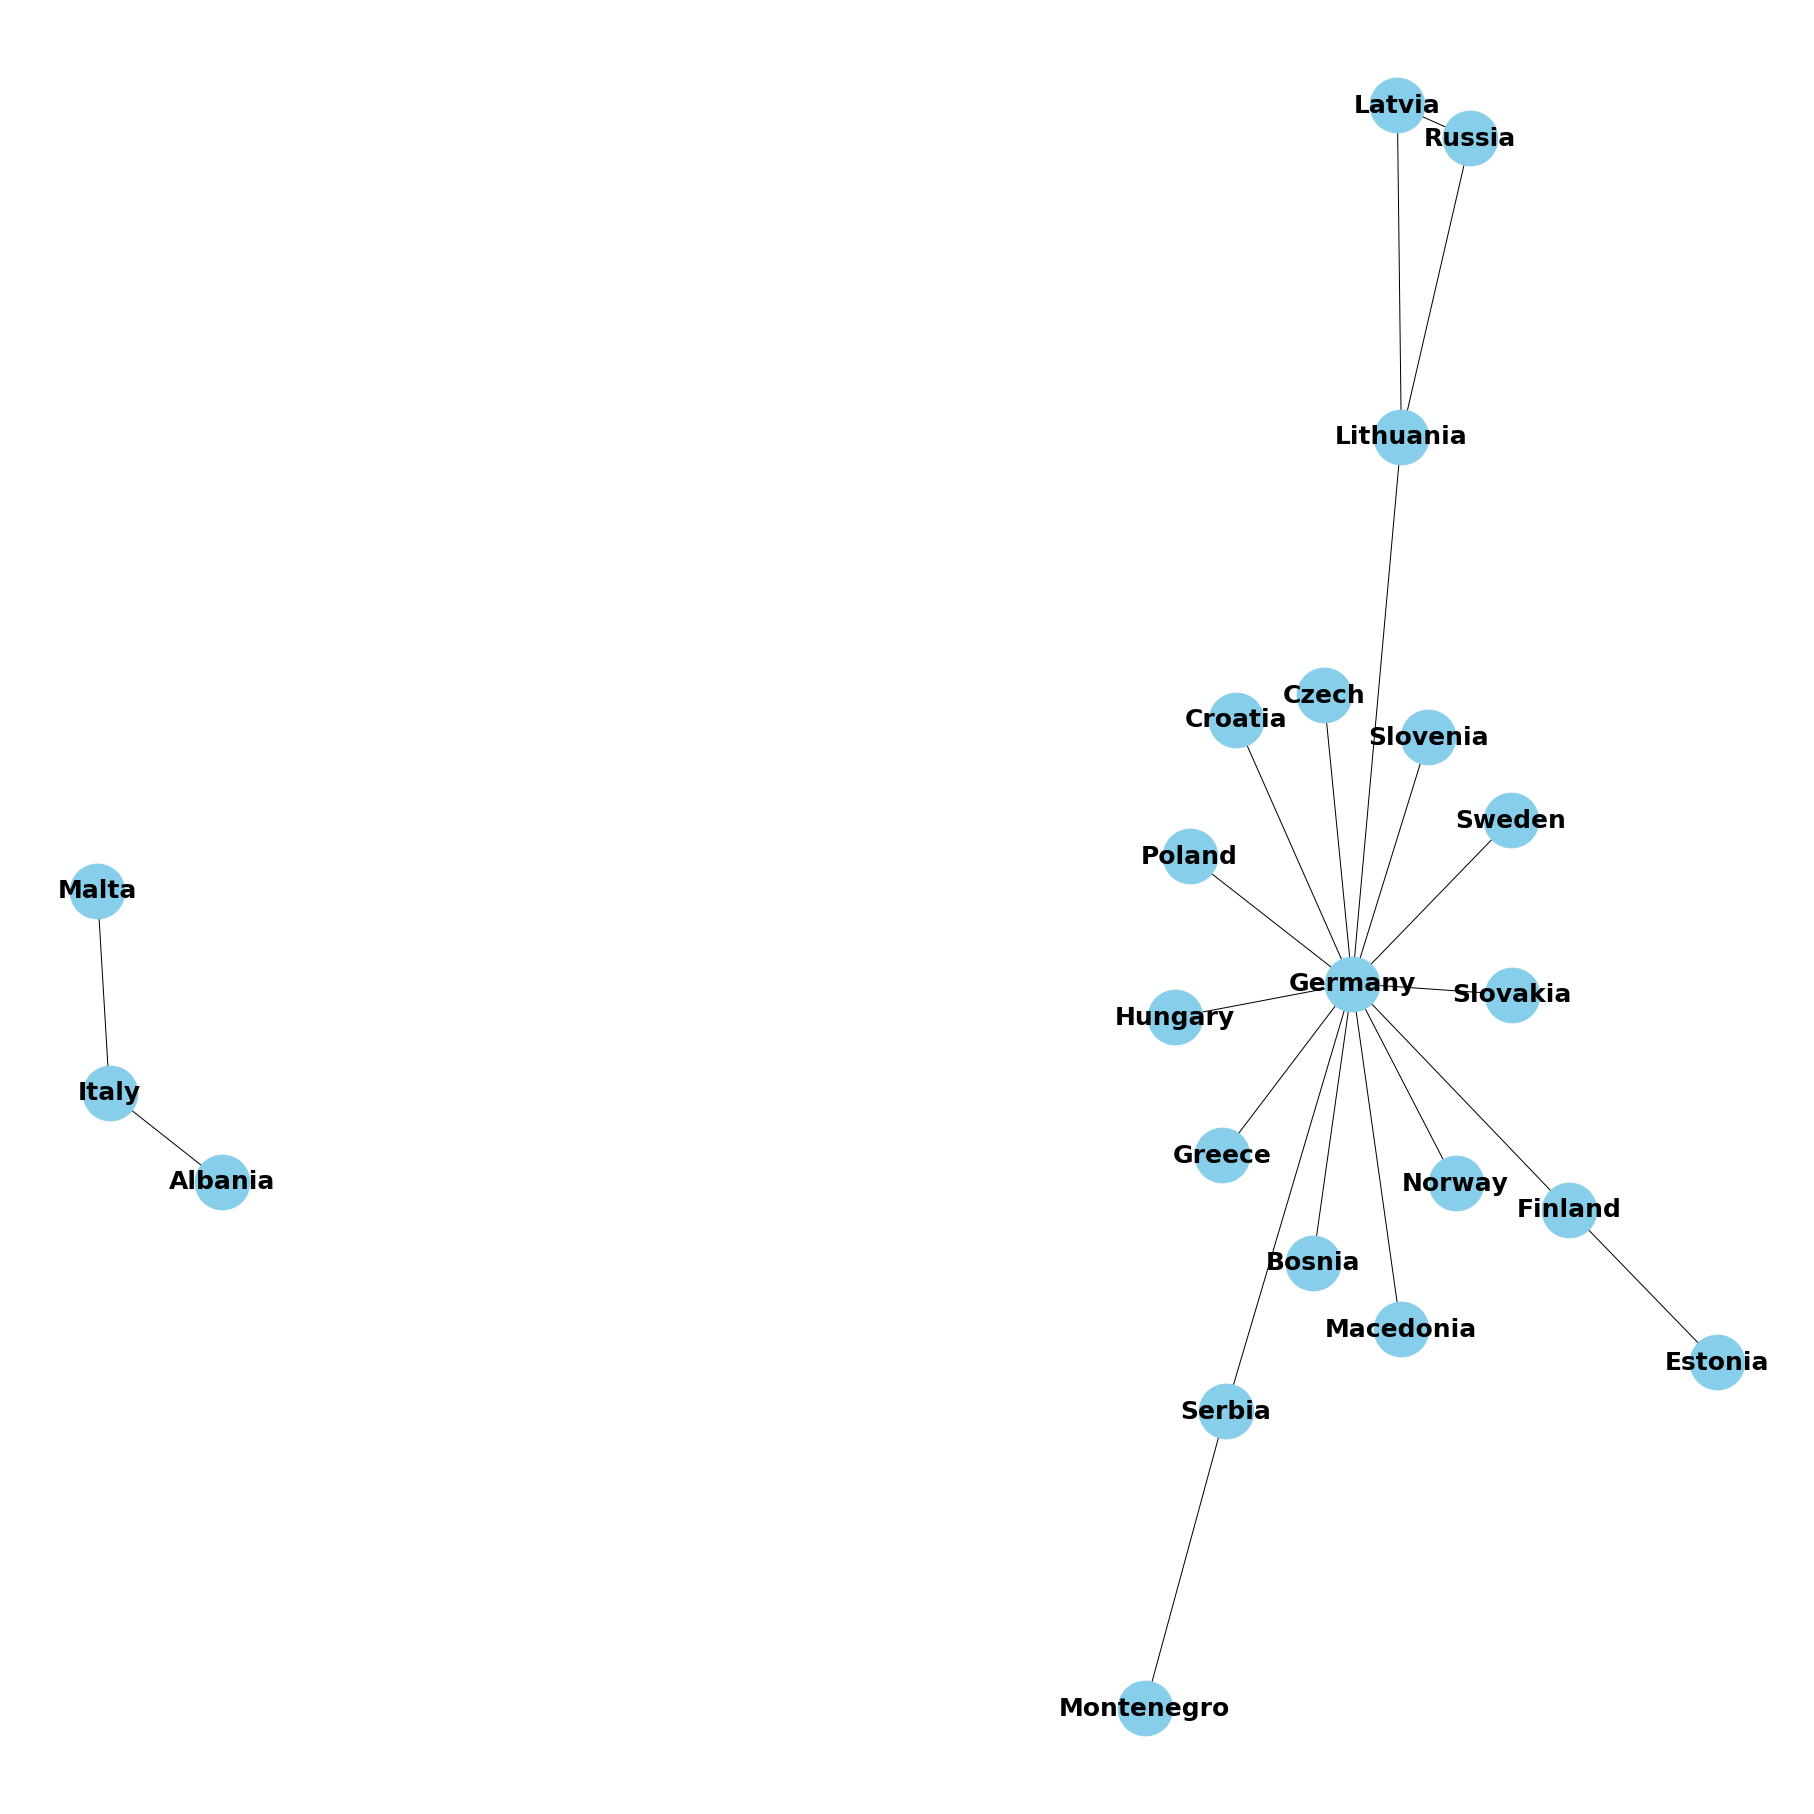

In [17]:
#Region network

countries = ['Sweden','Slovakia','Greece','Slovenia','Poland','Lithuania','Hungary','Czech','Croatia','Bosnia','Finland','Macedonia','Norway','Serbia','Montenegro','Estonia','Italy','Albania','Malta','Latvia','Russia']
G = nx.Graph()
G.add_nodes_from(countries,data=True)
G.add_node('Germany', color='g')
G.add_edge('Germany','Sweden')
G.add_edge('Germany','Slovakia')
G.add_edge('Germany','Greece')
G.add_edge('Germany','Slovenia')
G.add_edge('Germany','Poland')
G.add_edge('Germany','Lithuania')
G.add_edge('Germany','Hungary')
G.add_edge('Germany','Czech')
G.add_edge('Germany','Croatia')
G.add_edge('Germany','Bosnia')
G.add_edge('Germany','Finland')
G.add_edge('Germany','Macedonia')
G.add_edge('Germany','Norway')
G.add_edge('Germany','Serbia')
G.add_edge('Serbia','Montenegro')
G.add_edge('Estonia','Finland')
G.add_edge('Italy','Malta')
G.add_edge('Italy','Albania')
G.add_edge('Russia','Latvia')
G.add_edge('Russia','Lithuania')
G.add_edge('Latvia','Lithuania')
plt.figure(figsize=(25,25))
nx.draw(G, with_labels=True,node_color='skyblue',node_size=3000,edge_color='k',width=1,pos=nx.fruchterman_reingold_layout(G,scale=2),font_weight='bold',font_size=25,dpi=1000)

plt.savefig("network.png")
plt.show()

# General data
* overview of the region

In [18]:
#total population of the region
total_pop = ee_df['Population, total'].sum()
f"{total_pop:,}"

'125,921,885'

In [19]:
#slicing population by country
pop = ee_df['Population, total']
pop

0      2066388
1     10594438
2      5439232
3      5508214
4      5276968
5      1830700
6      2873457
7     10057698
8       467999
9      9787966
10     4124531
11    37974826
12      622373
13     1317384
14     3351527
15     2081996
16     1942248
17    10754679
18     2828403
19     7020858
Name: Population, total, dtype: int64

In [20]:
#Add country names to pop
pop_complete = pd.concat([c_codes_df,pop], axis=1, join='inner')
pop_complete.sort_values(by=['Population, total'])

,Country Code,"Population, total"
8,MLT,467999
12,MNE,622373
13,EST,1317384
5,XKX,1830700
16,LVA,1942248
0,SVN,2066388
15,MKD,2081996
18,LTU,2828403
6,ALB,2873457
14,BIH,3351527


In [21]:
#slicing population density by country
pop_dens = ee_df['Population density (people per sq. km of land area)']
pop_dens

0      102.591006
1      137.198109
2      113.128785
3       18.124491
4       14.452576
5      168.154680
6      104.870693
7       24.692981
8     1462.496875
9      108.118480
10      73.704986
11     124.023730
12      46.273086
13      30.305590
14      65.459512
15      82.553370
16      31.235896
17      83.434282
18      45.151862
19      80.275074
Name: Population density (people per sq. km of land area), dtype: float64

In [22]:
#Add country names to population density
pop_dens_complete = pd.concat([c_codes_df,pop_dens], axis=1, join='inner')
pop_dens_complete.sort_values(by=['Population density (people per sq. km of land area)'])

,Country Code,Population density (people per sq. km of land area)
4,NOR,14.452576
3,FIN,18.124491
7,SWE,24.692981
13,EST,30.305590
16,LVA,31.235896
18,LTU,45.151862
12,MNE,46.273086
14,BIH,65.459512
10,HRV,73.704986
19,SRB,80.275074


In [23]:
#Descriptive statistics from population density
pop_dens_complete.describe()

,Population density (people per sq. km of land area)
count,20.000000
mean,145.812303
std,312.824415
min,14.452576
25%,41.672870
50%,81.414222
75%,109.371056
max,1462.496875


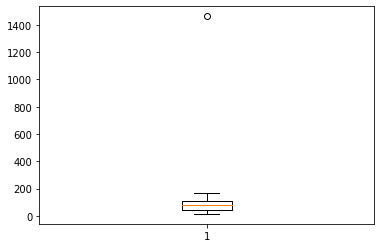

In [24]:
#Population density boxplot (1 huge Outlier)
plt.boxplot(pop_dens)
plt.show()

In [25]:
#exclude Malta from dataset and calculate descriptive statistics
pop_dens_complete_wo_malta = pop_dens_complete.drop([0])
pop_dens_complete_wo_malta.sort_values(by=['Population density (people per sq. km of land area)'])


,Country Code,Population density (people per sq. km of land area)
4,NOR,14.452576
3,FIN,18.124491
7,SWE,24.692981
13,EST,30.305590
16,LVA,31.235896
18,LTU,45.151862
12,MNE,46.273086
14,BIH,65.459512
10,HRV,73.704986
19,SRB,80.275074


In [26]:
#Descriptive statistics from population density (without Malta)
pop_dens_complete_wo_malta.describe()

,Population density (people per sq. km of land area)
count,19.000000
mean,148.087108
std,321.226536
min,14.452576
25%,38.193879
50%,80.275074
75%,110.623633
max,1462.496875


In [27]:
#Order and clean column names on density dataframe

density = pop_dens_complete_wo_malta.sort_values(by=['Country Code'])
density = density.rename(columns={'Country Code':'iso_a3','Population density (people per sq. km of land area)':'den'})
density['den'] = density['den'].astype(float)
density


,iso_a3,den
6,ALB,104.870693
14,BIH,65.459512
1,CZE,137.198109
13,EST,30.305590
3,FIN,18.124491
17,GRC,83.434282
10,HRV,73.704986
9,HUN,108.118480
18,LTU,45.151862
16,LVA,31.235896


In [28]:
# Fix Kosovo iso_a3 code, order by iso_a3 and save dataframe in this order

ee_map_1 = ee_map.replace('-99','XKX')
ee_map_1['pop_est'] = ee_map_1['pop_est'].astype(float)
ee_map_1 = ee_map_1.sort_values(by=['iso_a3'])
ee_map_1

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
125,3047987.0,Europe,Albania,ALB,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
170,3856181.0,Europe,Bosnia and Herz.,BIH,42530.0,"POLYGON ((18.56000 42.65000, 17.67492 43.02856..."
153,10674723.0,Europe,Czechia,CZE,350900.0,"POLYGON ((15.01700 51.10667, 15.49097 50.78473..."
120,1251581.0,Europe,Estonia,EST,38700.0,"POLYGON ((27.98113 59.47537, 27.98112 59.47537..."
151,5491218.0,Europe,Finland,FIN,224137.0,"POLYGON ((28.59193 69.06478, 28.44594 68.36461..."
123,10768477.0,Europe,Greece,GRC,290500.0,"MULTIPOLYGON (((26.29000 35.29999, 26.16500 35..."
126,4292095.0,Europe,Croatia,HRV,94240.0,"POLYGON ((16.56481 46.50375, 16.88252 46.38063..."
115,9850845.0,Europe,Hungary,HUN,267600.0,"POLYGON ((22.08561 48.42226, 22.64082 48.15024..."
118,2823859.0,Europe,Lithuania,LTU,85620.0,"POLYGON ((26.49433 55.61511, 26.58828 55.16718..."
119,1944643.0,Europe,Latvia,LVA,50650.0,"POLYGON ((27.28818 57.47453, 27.77002 57.24426..."


In [29]:
#Replace column pop_est with density, but since the indexes do not match we need to use .values method
ee_map_1['pop_est'] = density['den'].values
ee_map_1 = ee_map_1.rename(columns = {'pop_est':'pop_density'})
ee_map_1

,pop_density,continent,name,iso_a3,gdp_md_est,geometry
125,104.870693,Europe,Albania,ALB,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
170,65.459512,Europe,Bosnia and Herz.,BIH,42530.0,"POLYGON ((18.56000 42.65000, 17.67492 43.02856..."
153,137.198109,Europe,Czechia,CZE,350900.0,"POLYGON ((15.01700 51.10667, 15.49097 50.78473..."
120,30.305590,Europe,Estonia,EST,38700.0,"POLYGON ((27.98113 59.47537, 27.98112 59.47537..."
151,18.124491,Europe,Finland,FIN,224137.0,"POLYGON ((28.59193 69.06478, 28.44594 68.36461..."
123,83.434282,Europe,Greece,GRC,290500.0,"MULTIPOLYGON (((26.29000 35.29999, 26.16500 35..."
126,73.704986,Europe,Croatia,HRV,94240.0,"POLYGON ((16.56481 46.50375, 16.88252 46.38063..."
115,108.118480,Europe,Hungary,HUN,267600.0,"POLYGON ((22.08561 48.42226, 22.64082 48.15024..."
118,45.151862,Europe,Lithuania,LTU,85620.0,"POLYGON ((26.49433 55.61511, 26.58828 55.16718..."
119,31.235896,Europe,Latvia,LVA,50650.0,"POLYGON ((27.28818 57.47453, 27.77002 57.24426..."


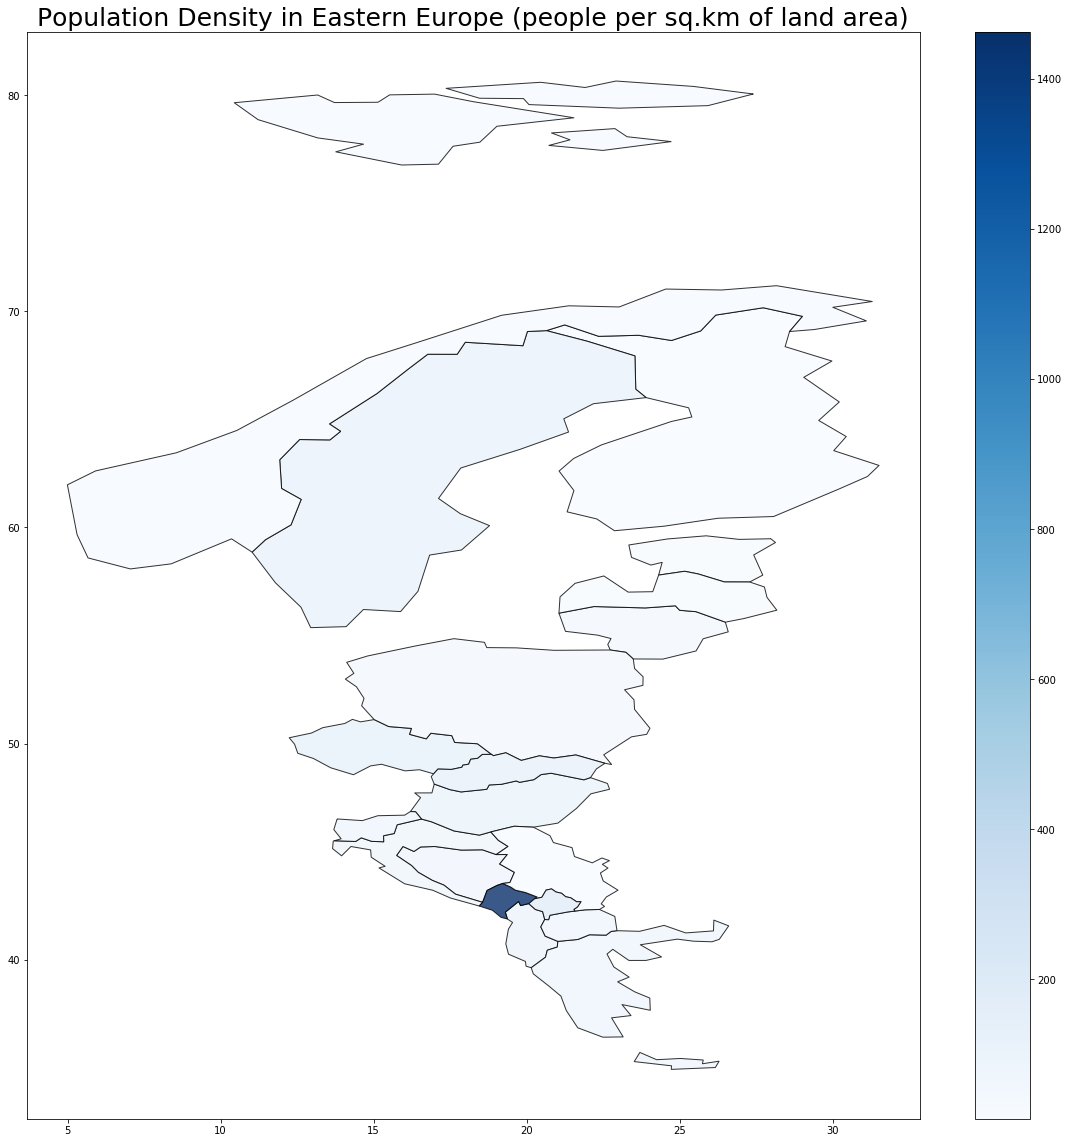

In [30]:
ee_map_1.plot(figsize=(20,20), alpha=0.8, edgecolor='k',column = 'pop_density',legend = True, cmap='Blues')
plt.title('Population Density in Eastern Europe (people per sq.km of land area)',fontsize=25)
plt.axis('tight')
plt.savefig("pop_density.png")

In [31]:
#surface area sq.km
area = ee_df['Surface area (sq. km)'].sum().round(0)
f"{area:,}"

'2,548,095.0'

In [32]:
#slicing area by country
area = ee_df['Surface area (sq. km)']
area

0      20675.000000
1      78870.000000
2      49030.000000
3     338450.000000
4     625217.109375
5      10887.000000
6      28750.000000
7     447430.000000
8        320.000000
9      93030.000000
10     56590.000000
11    312680.000000
12     13810.000000
13     45340.000000
14     51210.000000
15     25710.000000
16     64490.000000
17    131960.000000
18     65286.000977
19     88360.000000
Name: Surface area (sq. km), dtype: float64

In [33]:
#Add country names to area
area_complete = pd.concat([c_codes_df,area], axis=1, join='inner')
area_complete.sort_values(by=['Surface area (sq. km)'])

,Country Code,Surface area (sq. km)
8,MLT,320.000000
5,XKX,10887.000000
12,MNE,13810.000000
0,SVN,20675.000000
15,MKD,25710.000000
6,ALB,28750.000000
13,EST,45340.000000
2,SVK,49030.000000
14,BIH,51210.000000
10,HRV,56590.000000


In [34]:
#slicing population growth by country
pop_grow = ee_df['Population growth (annual %)']
pop_grow

0     0.065159
1     0.265643
2     0.155179
3     0.234671
4     0.807673
5     0.795200
6    -0.091972
7     1.347445
8     2.738663
9    -0.265861
10   -1.200610
11    0.012480
12    0.011248
13    0.121071
14   -1.031207
15    0.060105
16   -0.886216
17   -0.197783
18   -1.398322
19   -0.532191
Name: Population growth (annual %), dtype: float64

In [35]:
#Add country names to pop_growth
pop_growth_complete = pd.concat([c_codes_df,pop_grow], axis=1, join='inner')
pop_growth_complete.sort_values(by=['Population growth (annual %)'])

,Country Code,Population growth (annual %)
18,LTU,-1.398322
10,HRV,-1.200610
14,BIH,-1.031207
16,LVA,-0.886216
19,SRB,-0.532191
9,HUN,-0.265861
17,GRC,-0.197783
6,ALB,-0.091972
12,MNE,0.011248
11,POL,0.012480


In [36]:
#population descriptive statistics
pop_growth_complete.describe().round(2)

,Population growth (annual %)
count,20.00
mean,0.05
std,0.93
min,-1.40
25%,-0.33
50%,0.04
75%,0.24
max,2.74


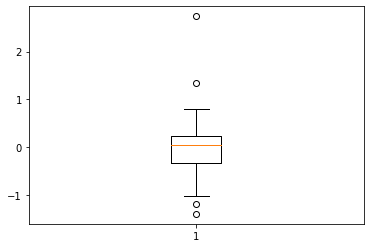

In [37]:
#Population growth boxplot (4 Outliers)
plt.boxplot(pop_grow)
plt.show()

In [38]:
# Slicing Rural_pop
rural_pop = ee_df['Rural population (% of total population)'].round(0)
rural_pop

0     46.0
1     26.0
2     46.0
3     15.0
4     18.0
5     62.0
6     41.0
7     13.0
8      5.0
9     29.0
10    43.0
11    40.0
12    34.0
13    31.0
14    52.0
15    42.0
16    32.0
17    21.0
18    32.0
19    44.0
Name: Rural population (% of total population), dtype: float64

In [39]:
#Add country names to rural pop
rural_pop_complete = pd.concat([c_codes_df,rural_pop], axis=1, join='inner')
rural_pop_complete.sort_values(by=['Rural population (% of total population)'])

,Country Code,Rural population (% of total population)
8,MLT,5.0
7,SWE,13.0
3,FIN,15.0
4,NOR,18.0
17,GRC,21.0
1,CZE,26.0
9,HUN,29.0
13,EST,31.0
16,LVA,32.0
18,LTU,32.0


In [40]:
#Rural population descriptive statistics
rural_pop_complete.describe().round(0)

,Rural population (% of total population)
count,20.0
mean,34.0
std,14.0
min,5.0
25%,25.0
50%,33.0
75%,43.0
max,62.0


In [41]:
# Slicing urban_pop
urban_pop = ee_df['Urban population (% of total population)'].round(0)
urban_pop

0     54.0
1     74.0
2     54.0
3     85.0
4     82.0
5     38.0
6     59.0
7     87.0
8     95.0
9     71.0
10    57.0
11    60.0
12    66.0
13    69.0
14    48.0
15    58.0
16    68.0
17    79.0
18    68.0
19    56.0
Name: Urban population (% of total population), dtype: float64

In [42]:
#Add country names to urban pop
urban_pop_complete = pd.concat([c_codes_df,urban_pop], axis=1, join='inner')
urban_pop_complete.sort_values(by=['Urban population (% of total population)'])

,Country Code,Urban population (% of total population)
5,XKX,38.0
14,BIH,48.0
0,SVN,54.0
2,SVK,54.0
19,SRB,56.0
10,HRV,57.0
15,MKD,58.0
6,ALB,59.0
11,POL,60.0
12,MNE,66.0


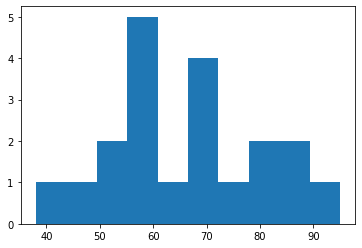

In [43]:
#Urban population distribution
plt.hist(urban_pop)
plt.show()

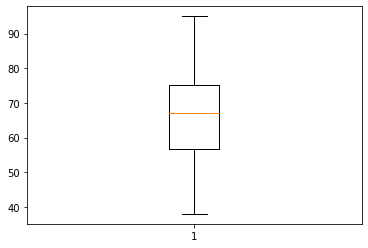

In [44]:
#Urban population boxplot (NO OUTLIERS!)
plt.boxplot(urban_pop)
plt.show()

In [45]:
#Urban population descriptive statistics
urban_pop_complete.describe().round(0)

,Urban population (% of total population)
count,20.0
mean,66.0
std,14.0
min,38.0
25%,57.0
50%,67.0
75%,75.0
max,95.0


In [46]:
# Slicing urban_pop_growth
urban_pop_grow = ee_df['Urban population growth (annual %)'].round(2)
urban_pop_grow

0     0.53
1     0.41
2     0.05
3     0.29
4     1.28
5     1.34
6     1.54
7     1.69
8     2.81
9     0.13
10   -0.73
11   -0.11
12    0.52
13    0.35
14   -0.28
15    0.38
16   -0.81
17    0.23
18   -1.18
19   -0.30
Name: Urban population growth (annual %), dtype: float64

In [47]:
#Add country names to urban pop
urban_pop_grow_complete = pd.concat([c_codes_df,urban_pop_grow], axis=1, join='inner')
urban_pop_grow_complete.sort_values(by=['Urban population growth (annual %)'])

,Country Code,Urban population growth (annual %)
18,LTU,-1.18
16,LVA,-0.81
10,HRV,-0.73
19,SRB,-0.30
14,BIH,-0.28
11,POL,-0.11
2,SVK,0.05
9,HUN,0.13
17,GRC,0.23
3,FIN,0.29


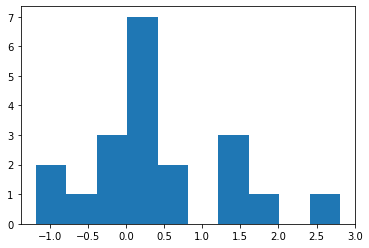

In [48]:
#Urban population growth distribution
plt.hist(urban_pop_grow)
plt.show()

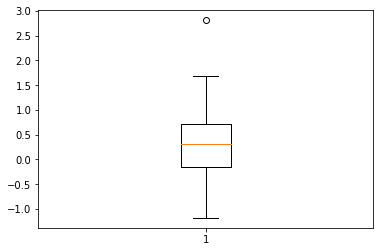

In [49]:
#Urban population growth boxplot
plt.boxplot(urban_pop_grow)
plt.show()

In [50]:
#Urban population growth descriptive statistics
urban_pop_grow_complete.describe().round(2)

,Urban population growth (annual %)
count,20.00
mean,0.41
std,0.95
min,-1.18
25%,-0.15
50%,0.32
75%,0.72
max,2.81


In [51]:
# Slicing population ages 65 and above (% of Population)
retired_pop = ee_df['Population ages 65 and above (% of total population)'].round(2)
retired_pop

0     19.02
1     19.00
2     15.08
3     21.28
4     16.83
5      7.28
6     13.33
7     19.99
8     19.89
9     18.58
10    20.02
11    16.93
12    14.55
13    19.31
14    15.75
15    13.25
16    19.83
17    21.40
18    19.30
19    17.89
Name: Population ages 65 and above (% of total population), dtype: float64

In [52]:
#Add country names to retired pop
retired_pop_complete = pd.concat([c_codes_df,retired_pop], axis=1, join='inner')
retired_pop_complete.sort_values(by=['Population ages 65 and above (% of total population)'])

,Country Code,Population ages 65 and above (% of total population)
5,XKX,7.28
15,MKD,13.25
6,ALB,13.33
12,MNE,14.55
2,SVK,15.08
14,BIH,15.75
4,NOR,16.83
11,POL,16.93
19,SRB,17.89
9,HUN,18.58


In [53]:
#retired population descriptive statistics
retired_pop_complete.describe().round(0)

,Population ages 65 and above (% of total population)
count,20.0
mean,17.0
std,3.0
min,7.0
25%,16.0
50%,19.0
75%,20.0
max,21.0


In [54]:
#Female population per country and total
f_pop = ee_df['Population, female']
f_pop.astype(float)
f_pop_total = f_pop.sum()
f_pop_total.astype(float)

64404722.0

In [55]:
#convert pop to float
pop.astype(float)


0      2066388.0
1     10594438.0
2      5439232.0
3      5508214.0
4      5276968.0
5      1830700.0
6      2873457.0
7     10057698.0
8       467999.0
9      9787966.0
10     4124531.0
11    37974826.0
12      622373.0
13     1317384.0
14     3351527.0
15     2081996.0
16     1942248.0
17    10754679.0
18     2828403.0
19     7020858.0
Name: Population, total, dtype: float64

In [56]:
#Female population as percentage

f_percent = f_pop / pop
f_percent

0     0.502676
1     0.508317
2     0.513616
3     0.507398
4     0.495615
5     0.479525
6     0.490464
7     0.499668
8     0.498864
9     0.524471
10    0.518831
11    0.515234
12    0.505618
13    0.529955
14    0.509994
15    0.499622
16    0.540679
17    0.509126
18    0.538494
19    0.509947
dtype: float64

In [57]:
#Male population per country and total
m_pop = ee_df['Population, male']
m_pop.astype(float)
m_pop_total = m_pop.sum()
m_pop_total.astype(float)

61496625.0

In [58]:
#Male population as percentage

m_percent = m_pop / pop
m_percent

0     0.497324
1     0.491683
2     0.486384
3     0.492602
4     0.504385
5     0.509256
6     0.509536
7     0.500332
8     0.501136
9     0.475529
10    0.481169
11    0.484766
12    0.494382
13    0.470045
14    0.490006
15    0.500378
16    0.459321
17    0.490874
18    0.461506
19    0.490053
dtype: float64

In [59]:
#Add country names to percentages female and male pop
pop_percent = pd.concat([c_codes_df,f_percent,m_percent], axis=1, join='inner')
pop_percent = pop_percent.rename(columns = {0:'fem(%)',1:'male(%)'})
pop_percent

,Country Code,fem(%),male(%)
0,SVN,0.502676,0.497324
1,CZE,0.508317,0.491683
2,SVK,0.513616,0.486384
3,FIN,0.507398,0.492602
4,NOR,0.495615,0.504385
5,XKX,0.479525,0.509256
6,ALB,0.490464,0.509536
7,SWE,0.499668,0.500332
8,MLT,0.498864,0.501136
9,HUN,0.524471,0.475529


In [60]:
#total percentage of female population in eastern europe
total_fem_percent = 100*( f_pop_total / total_pop )
total_fem_percent.round(2)

51.15

In [61]:
#total percentage of male population in eastern europe
total_male_percent = 100*( m_pop_total / total_pop )
total_male_percent.round(2)

48.84

# Education


In [62]:
#Literacy rate
literacy = ee_df['literacy rate']

for i in range(0,len(literacy)):
    if type(literacy[i]) == str:
        literacy[i] = float(literacy[i].rstrip(" %"))
    else:
        literacy[i] = float(literacy[i])

pd.to_numeric(literacy,errors='coerce')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0     99.7
1     99.0
2     99.6
3     99.0
4     99.0
5     91.9
6     97.6
7     99.0
8     94.4
9     99.1
10    99.3
11    99.8
12    98.7
13    99.8
14    98.5
15    97.8
16    99.9
17    97.7
18    99.8
19    98.8
Name: literacy rate, dtype: float64

In [63]:
#Add country names to literacy rate
lit_rate = pd.concat([c_codes_df,literacy], axis=1, join='inner')
lit_rate.sort_values(by=['literacy rate'])

,Country Code,literacy rate
5,XKX,91.9
8,MLT,94.4
6,ALB,97.6
17,GRC,97.7
15,MKD,97.8
14,BIH,98.5
12,MNE,98.7
19,SRB,98.8
1,CZE,99
3,FIN,99


In [64]:
# average literacy in eastern europe
literacy.astype('float')
literacy.mean().round(1)

98.4

In [65]:
#Government Expenditure on education
ed_exp = ee_df['Government expenditure on education, total (% of government expenditure)']
ed_exp

0     4.60
1     3.80
2     4.60
3     6.80
4     6.70
5     4.85
6     4.00
7     7.10
8     5.40
9     4.30
10    4.60
11    4.80
12    3.80
13    4.90
14    3.30
15    3.30
16    5.30
17    3.70
18    4.10
19    3.80
Name: Government expenditure on education, total (% of government expenditure), dtype: float64

In [66]:
#Stat summary expenditure in education

ed_exp.describe().round(2)

count    20.00
mean      4.69
std       1.11
min       3.30
25%       3.80
50%       4.60
75%       5.00
max       7.10
Name: Government expenditure on education, total (% of government expenditure), dtype: float64

In [67]:
#Add country names to expenditure in education
expend = pd.concat([c_codes_df,ed_exp], axis=1, join='inner')
expend.sort_values(by=['Government expenditure on education, total (% of government expenditure)'])

,Country Code,"Government expenditure on education, total (% of government expenditure)"
15,MKD,3.30
14,BIH,3.30
17,GRC,3.70
19,SRB,3.80
1,CZE,3.80
12,MNE,3.80
6,ALB,4.00
18,LTU,4.10
9,HUN,4.30
10,HRV,4.60


# Health & living standards 

In [68]:
#Life expectancy

life_exp = ee_df['Life expectancy at birth, total (years)']
life_exp

0     81.175610
1     79.475610
2     77.165854
3     81.429268
4     82.509756
5     71.946341
6     78.333000
7     82.307317
8     82.453659
9     76.063415
10    77.826829
11    77.851220
12    76.667000
13    77.641463
14    77.128000
15    75.589000
16    74.680488
17    81.387805
18    74.670732
19    76.087805
Name: Life expectancy at birth, total (years), dtype: float64

In [69]:
life_exp.describe().round(0)

count    20.0
mean     78.0
std       3.0
min      72.0
25%      76.0
50%      78.0
75%      81.0
max      83.0
Name: Life expectancy at birth, total (years), dtype: float64

In [70]:
#Add country names to life expectancy
expectancy = pd.concat([c_codes_df,life_exp], axis=1, join='inner')
expectancy.sort_values(by=['Life expectancy at birth, total (years)'])

,Country Code,"Life expectancy at birth, total (years)"
5,XKX,71.946341
18,LTU,74.670732
16,LVA,74.680488
15,MKD,75.589000
9,HUN,76.063415
19,SRB,76.087805
12,MNE,76.667000
14,BIH,77.128000
2,SVK,77.165854
13,EST,77.641463


In [71]:
# Death rate

death_rate = ee_df['Death rate, crude (per 1,000 people)']
death_rate

0      9.900
1     10.500
2      9.900
3      9.800
4      7.700
5      7.000
6      7.714
7      9.100
8      7.600
9     13.500
10    13.000
11    10.600
12    10.592
13    11.800
14    10.563
15     9.965
16    14.800
17    11.600
18    14.200
19    14.800
Name: Death rate, crude (per 1,000 people), dtype: float64

In [72]:
death_rate.describe().round(0)

count    20.0
mean     11.0
std       2.0
min       7.0
25%      10.0
50%      11.0
75%      12.0
max      15.0
Name: Death rate, crude (per 1,000 people), dtype: float64

In [73]:
#Add country names to death rate
d_rate = pd.concat([c_codes_df,death_rate], axis=1, join='inner')
d_rate.sort_values(by=['Death rate, crude (per 1,000 people)'])

,Country Code,"Death rate, crude (per 1,000 people)"
5,XKX,7.000
8,MLT,7.600
4,NOR,7.700
6,ALB,7.714
7,SWE,9.100
3,FIN,9.800
0,SVN,9.900
2,SVK,9.900
15,MKD,9.965
1,CZE,10.500


In [74]:
# Birth rate

birth_rate = ee_df['Birth rate, crude (per 1,000 people)']
birth_rate

0      9.800
1     10.800
2     10.700
3      9.100
4     10.700
5     16.400
6     11.934
7     11.500
8      9.200
9      9.700
10     8.900
11    10.600
12    11.775
13    10.500
14     8.293
15    10.953
16    10.700
17     8.200
18    10.100
19     9.200
Name: Birth rate, crude (per 1,000 people), dtype: float64

In [75]:
birth_rate.describe().round(0)

count    20.0
mean     10.0
std       2.0
min       8.0
25%       9.0
50%      11.0
75%      11.0
max      16.0
Name: Birth rate, crude (per 1,000 people), dtype: float64

In [76]:
#Add country names to birth rate
b_rate = pd.concat([c_codes_df,birth_rate], axis=1, join='inner')
b_rate.sort_values(by=['Birth rate, crude (per 1,000 people)'])

,Country Code,"Birth rate, crude (per 1,000 people)"
17,GRC,8.200
14,BIH,8.293
10,HRV,8.900
3,FIN,9.100
19,SRB,9.200
8,MLT,9.200
9,HUN,9.700
0,SVN,9.800
18,LTU,10.100
13,EST,10.500


In [77]:
#subseting information with health details
Country = ee_df['Country Code']

Birth_rate = ee_df['Birth rate, crude (per 1,000 people)']

Fertility_rate = ee_df['Adolescent fertility rate (births per 1,000 women ages 15-19)']

Death_rate = ee_df['Death rate, crude (per 1,000 people)']

Life_expectancy = ee_df['Life expectancy at birth, total (years)']

F_rate = ee_df['Fertility rate, total (births per woman)']


In [78]:
#forming table with information on health rates

life_data = pd.concat([Country, Birth_rate, Death_rate, Fertility_rate, Life_expectancy, F_rate],axis = 1, join = 'inner')
life_data

,Country Code,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)","Adolescent fertility rate (births per 1,000 women ages 15-19)","Life expectancy at birth, total (years)","Fertility rate, total (births per woman)"
0,SVN,9.800,9.900,3.776,81.175610,1.580
1,CZE,10.800,10.500,11.972,79.475610,1.630
2,SVK,10.700,9.900,25.684,77.165854,1.480
3,FIN,9.100,9.800,5.813,81.429268,1.490
4,NOR,10.700,7.700,5.141,82.509756,1.710
5,XKX,16.400,7.000,16.900,71.946341,2.020
6,ALB,11.934,7.714,19.642,78.333000,1.638
7,SWE,11.500,9.100,5.076,82.307317,1.850
8,MLT,9.200,7.600,12.879,82.453659,1.370
9,HUN,9.700,13.500,23.979,76.063415,1.530


In [79]:
#creating a data frame with information on world statistics
w_df = pd.read_excel('WDIW Dataset_Team 2.xlsx', sheet_name= 0)
w_df

,Country Code,Keep or not,Country Name,Hult Region,Cool Name,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),...,Poverty headcount ratio at national poverty lines (% of population),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Prevalence of underweight, weight for age (% of children under 5)",Rural population (% of total population),"Services, value added (% of GDP)",Surface area (sq. km),Tax revenue (% of GDP),Urban population (% of total population),Urban population growth (annual %)
0,NER,NaN,Niger,Northern Sub-Saharan Africa,Bumblebee,20.041904,10.844501,67.097740,186.538,111.343400,...,NaN,0.3,16.5,NaN,83.650,38.310716,1267000.0,NaN,16.350,4.206788
1,SOM,NaN,Somalia,East/South Africa,Jazz,32.946514,8.718997,63.296543,100.085,98.438930,...,NaN,0.1,NaN,NaN,55.609,NaN,637660.0,0.000108,44.391,4.108545
2,COD,NaN,"Congo, Dem. Rep.",Sub-Saharan Africa,Sideswipe,19.093632,NaN,49.189812,124.220,97.251231,...,NaN,0.8,NaN,NaN,56.120,33.750293,2344860.0,NaN,43.880,4.572945
3,MLI,NaN,Mali,Northern Sub-Saharan Africa,Bumblebee,43.089840,11.711073,87.191605,169.127,100.955473,...,NaN,1.3,6.3,NaN,58.428,37.539617,1240190.0,15.870569,41.572,4.915262
4,TCD,NaN,Chad,Northern Sub-Saharan Africa,Bumblebee,10.876416,2.488017,39.185883,161.090,99.470559,...,NaN,1.3,37.5,NaN,77.142,33.507131,1284000.0,NaN,22.858,3.872530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,PLW,NaN,Palau,Australia & Oceania,Cliffhanger,100.000000,100.000000,100.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,20.635,78.404270,460.0,19.638711,79.365,1.210151
213,KNA,NaN,Saint Kitts & Nevis,Carribean Islands & Parts of Latin America,Ratchet,100.000000,100.000000,100.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,69.227,63.117361,260.0,18.553102,30.773,0.758363
214,SXM,NaN,Sint Maarten (Dutch part),Western Europe,Jetfire,100.000000,100.000000,100.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,34.0,NaN,100.000,1.502331
215,TCA,NaN,Turks & Caicos Is,Carribean Islands & Parts of Latin America,Ratchet,100.000000,100.000000,100.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,7.183,75.562363,950.0,NaN,92.817,1.833893


In [80]:
#subseting to get world averages
world_data = w_df[213:214]
world_data

,Country Code,Keep or not,Country Name,Hult Region,Cool Name,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),...,Poverty headcount ratio at national poverty lines (% of population),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Prevalence of underweight, weight for age (% of children under 5)",Rural population (% of total population),"Services, value added (% of GDP)",Surface area (sq. km),Tax revenue (% of GDP),Urban population (% of total population),Urban population growth (annual %)
213,KNA,NaN,Saint Kitts & Nevis,Carribean Islands & Parts of Latin America,Ratchet,100.0,100.0,100.0,NaN,NaN,...,NaN,NaN,NaN,NaN,69.227,63.117361,260.0,18.553102,30.773,0.758363


In [81]:
#subsetting to get relevant health information from the world averages
World_code = world_data['Country Code']

W_birth_rate = world_data['Birth rate, crude (per 1,000 people)']

W_fertility_rate = world_data['Adolescent fertility rate (births per 1,000 women ages 15-19)']

W_death_rate = world_data['Death rate, crude (per 1,000 people)']

W_life_expectancy = world_data['Life expectancy at birth, total (years)']

W_F_rate = world_data['Fertility rate, total (births per woman)']

In [82]:
#combining the world health averages onto one table
World_life = pd.concat([World_code, W_birth_rate, W_death_rate, W_fertility_rate, W_life_expectancy, W_F_rate],axis = 1, join = 'inner')

World_life

,Country Code,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)","Adolescent fertility rate (births per 1,000 women ages 15-19)","Life expectancy at birth, total (years)","Fertility rate, total (births per woman)"
213,KNA,NaN,NaN,NaN,NaN,NaN


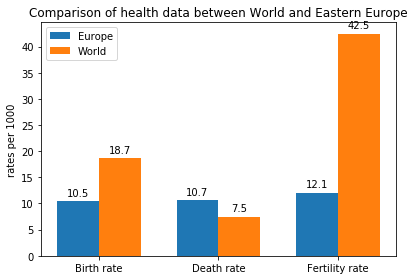

In [83]:
#forming a grouped bar graph to compare world averages with E.Europes averages
labels = ['Birth rate', 'Death rate', 'Fertility rate']
EE_average = [10.5, 10.7, 12.1]
World_average = [18.7, 7.5, 42.5]

x= np.arange(len(labels))
width = 0.35

ig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, EE_average, width, label='Europe')
rects2 = ax.bar(x + width/2, World_average, width, label='World')

ax.set_ylabel('rates per 1000')
ax.set_title('Comparison of health data between World and Eastern Europe')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

        
        
autolabel(rects1)
autolabel(rects2)

plt.tight_layout()

plt.savefig('Health data graphs')
plt.show()



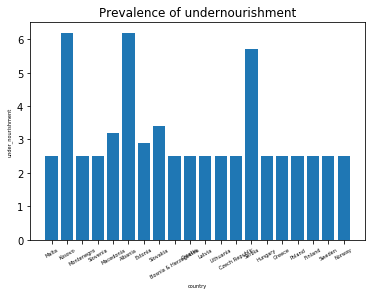

In [84]:
#Undernourishment

country = ['Malta','Kosovo','Montenegro','Slovenia','Macedonia','Albania','Estonia','Slovakia','Bosnia & Herzegovina','Croatia','Latvia','Lithuania',
            'Czech Republic','Serbia','Hungary','Greece','Poland','Finland','Sweden','Norway']
under_nourishment = [2.5,6.2,2.5,2.5,3.2,6.2,2.9,3.4,2.5,2.5,2.5,2.5,2.5,5.7,2.5,2.5,2.5,2.5,2.5,2.5]
    # this is for plotting purpose
index = np.arange(len(country))
plt.bar(index, under_nourishment)
plt.xlabel('country', fontsize=5)
plt.ylabel('under_nourishment', fontsize=5)
plt.xticks(index, country, fontsize=5, rotation=30)
plt.title('Prevalence of undernourishment')
plt.show()


# Economics

In [85]:
#GDP per country
GDP = ee_df['GDP (current US$)']/1000000000
GDP

0      48.455919
1     215.913545
2      95.617670
3     252.331137
4     399.488898
5       7.227765
6      13.025062
7     535.607386
8      12.748803
9     139.761138
10     55.201417
11    526.371021
12      4.844592
13     26.611652
14     18.080118
15     11.279509
16     30.463302
17    203.085551
18     47.544460
19     44.120424
Name: GDP (current US$), dtype: float64

In [86]:
#Add country names to GDP
country_gdp = pd.concat([c_codes_df,GDP], axis=1, join='inner')
country_gdp.sort_values(by=['GDP (current US$)'])

,Country Code,GDP (current US$)
12,MNE,4.844592
5,XKX,7.227765
15,MKD,11.279509
8,MLT,12.748803
6,ALB,13.025062
14,BIH,18.080118
13,EST,26.611652
16,LVA,30.463302
19,SRB,44.120424
18,LTU,47.544460


In [87]:
#GDP growth per country
GDP_growth = ee_df['GDP growth (annual %)']
GDP_growth

0     4.880538
1     4.352604
2     3.188341
3     3.043325
4     1.980438
5     4.227909
6     3.836620
7     2.104716
8     6.705510
9     4.137064
10    2.921363
11    4.814130
12    4.716465
13    4.856687
14    3.163559
15    0.240521
16    4.636480
17    1.505099
18    4.139948
19    2.049311
Name: GDP growth (annual %), dtype: float64

In [88]:
GDP_growth.describe().round(1)

count    20.0
mean      3.6
std       1.5
min       0.2
25%       2.7
50%       4.0
75%       4.7
max       6.7
Name: GDP growth (annual %), dtype: float64

In [89]:
#Add country names to GDP_growth
country_gdp = pd.concat([c_codes_df,GDP_growth], axis=1, join='inner')
country_gdp.sort_values(by=['GDP growth (annual %)'])

,Country Code,GDP growth (annual %)
15,MKD,0.240521
17,GRC,1.505099
4,NOR,1.980438
19,SRB,2.049311
7,SWE,2.104716
10,HRV,2.921363
3,FIN,3.043325
14,BIH,3.163559
2,SVK,3.188341
6,ALB,3.836620


In [90]:
# Merchandise trade as percentage of GDP per country

trade = ee_df['Merchandise trade (% of GDP)']
trade

0     153.791324
1     160.015436
2     175.461292
3      54.951601
4      46.809311
5      72.430000
6      58.310662
7      57.342002
8      65.300247
9     158.359472
10     74.088677
11     88.944106
12     62.626532
13    117.140418
14     93.196294
15    118.932482
16    101.413824
17     44.025781
18    130.740786
19     88.265243
Name: Merchandise trade (% of GDP), dtype: float64

In [91]:
#Add country names to Merchandise trade (Imports + Exports)

m_trade = pd.concat([c_codes_df,trade], axis=1, join='inner')
m_trade.sort_values(by=['Merchandise trade (% of GDP)']).round(2)

,Country Code,Merchandise trade (% of GDP)
17,GRC,44.03
4,NOR,46.81
3,FIN,54.95
7,SWE,57.34
6,ALB,58.31
12,MNE,62.63
8,MLT,65.30
5,XKX,72.43
10,HRV,74.09
19,SRB,88.27


In [92]:
trade.describe()

count     20.000000
mean      96.107275
std       41.536135
min       44.025781
25%       61.547565
50%       88.604675
75%      121.884558
max      175.461292
Name: Merchandise trade (% of GDP), dtype: float64

In [93]:
# Age dependency ratio per country
age_dep = ee_df['Age dependency ratio (% of working-age population)']
age_dep

0     51.344338
1     52.397391
2     43.716890
3     60.076618
4     52.683567
5     48.120000
6     45.682097
7     59.965652
8     51.784284
9     49.142708
10    52.579572
11    46.650308
12    48.805132
13    55.123161
14    43.979067
15    42.675856
16    54.821739
17    55.289532
18    51.580489
19    50.876524
Name: Age dependency ratio (% of working-age population), dtype: float64

In [94]:
#Add country names to age dependency

dependency_ratio = pd.concat([c_codes_df,age_dep], axis=1, join='inner')
dependency_ratio.sort_values(by=['Age dependency ratio (% of working-age population)']).round(2)

,Country Code,Age dependency ratio (% of working-age population)
15,MKD,42.68
2,SVK,43.72
14,BIH,43.98
6,ALB,45.68
11,POL,46.65
5,XKX,48.12
12,MNE,48.81
9,HUN,49.14
19,SRB,50.88
0,SVN,51.34


In [95]:
age_dep.describe()

count    20.000000
mean     50.864746
std       4.899872
min      42.675856
25%      47.752577
50%      51.462413
75%      53.218110
max      60.076618
Name: Age dependency ratio (% of working-age population), dtype: float64

In [96]:
# Industry + Construction value added (% of GDP)
ind_va = ee_df['Industry (including construction), value added (% of GDP)']
ind_va

0     28.516139
1     33.216729
2     31.421310
3     24.376781
4     29.250986
5     25.564867
6     20.375120
7     22.178140
8     11.975281
9     25.627030
10    21.646861
11    29.600000
12    15.885660
13    24.441943
14    23.907695
15    24.134447
16    19.725236
17    15.038229
18    26.038294
19    26.089356
Name: Industry (including construction), value added (% of GDP), dtype: float64

In [97]:
#Add country names to industry value added

industry_va = pd.concat([c_codes_df,ind_va], axis=1, join='inner')
industry_va.sort_values(by=['Industry (including construction), value added (% of GDP)']).round(2)

,Country Code,"Industry (including construction), value added (% of GDP)"
8,MLT,11.98
17,GRC,15.04
12,MNE,15.89
16,LVA,19.73
6,ALB,20.38
10,HRV,21.65
7,SWE,22.18
14,BIH,23.91
15,MKD,24.13
3,FIN,24.38


In [98]:
ind_va.describe().round(0)

count    20.0
mean     24.0
std       5.0
min      12.0
25%      21.0
50%      24.0
75%      27.0
max      33.0
Name: Industry (including construction), value added (% of GDP), dtype: float64

In [99]:
# Services value added (% of GDP)
serv_va = ee_df['Services, value added (% of GDP)']
serv_va

0     56.671521
1     54.460285
2     55.559647
3     59.620039
4     57.466154
5     45.799592
6     47.965907
7     65.192616
8     75.673194
9     55.244699
10    57.811759
11    56.400000
12    59.111426
13    59.951242
14    55.781042
15    54.617580
16    64.479673
17    68.667852
18    60.715202
19    50.894733
Name: Services, value added (% of GDP), dtype: float64

In [100]:
serv_va.describe().round(0)

count    20.0
mean     58.0
std       7.0
min      46.0
25%      55.0
50%      57.0
75%      60.0
max      76.0
Name: Services, value added (% of GDP), dtype: float64

In [101]:
#Add country names to services value added

services_va = pd.concat([c_codes_df,serv_va], axis=1, join='inner')
services_va.sort_values(by=['Services, value added (% of GDP)']).round(2)

,Country Code,"Services, value added (% of GDP)"
5,XKX,45.80
6,ALB,47.97
19,SRB,50.89
1,CZE,54.46
15,MKD,54.62
9,HUN,55.24
2,SVK,55.56
14,BIH,55.78
11,POL,56.40
0,SVN,56.67


In [102]:
# Tax revenue (% of GDP)
tax_rev = ee_df['Tax revenue (% of GDP)']
tax_rev

0     18.437426
1     14.877358
2     17.744886
3     20.937129
4     22.478309
5     29.000000
6     18.879748
7     27.853298
8     26.433863
9     23.216223
10    21.610752
11    16.806045
12    19.224472
13    21.124059
14    20.259337
15    17.203028
16    23.426491
17    26.262142
18    16.665614
19    19.720000
Name: Tax revenue (% of GDP), dtype: float64

In [103]:
# Descriptive stats on tax revenue
tax_rev.describe()

count    20.000000
mean     21.108009
std       3.951056
min      14.877358
25%      18.264291
50%      20.598233
75%      23.268790
max      29.000000
Name: Tax revenue (% of GDP), dtype: float64

In [104]:
#Add country names to tax revenue

tax_revenue = pd.concat([c_codes_df,tax_rev], axis=1, join='inner')
tax_revenue.sort_values(by=['Tax revenue (% of GDP)']).round(2)

,Country Code,Tax revenue (% of GDP)
1,CZE,14.88
18,LTU,16.67
11,POL,16.81
15,MKD,17.20
2,SVK,17.74
0,SVN,18.44
6,ALB,18.88
12,MNE,19.22
19,SRB,19.72
14,BIH,20.26


In [105]:
# Gini index

gi_df = ee_df['GINI index (World Bank estimate) ']
gi_df

0     25.4
1     25.9
2     26.5
3     27.1
4     27.5
5     29.0
6     29.0
7     29.2
8     29.4
9     30.4
10    31.1
11    31.8
12    31.9
13    32.7
14    33.0
15    33.7
16    34.2
17    36.0
18    37.4
19    39.6
Name: GINI index (World Bank estimate) , dtype: float64

In [106]:
#Add country names to Gini index

gini_index = pd.concat([c_codes_df,gi_df], axis=1, join='inner')
gini_index.sort_values(by=['GINI index (World Bank estimate) ']).round(2)

,Country Code,GINI index (World Bank estimate)
0,SVN,25.4
1,CZE,25.9
2,SVK,26.5
3,FIN,27.1
4,NOR,27.5
5,XKX,29.0
6,ALB,29.0
7,SWE,29.2
8,MLT,29.4
9,HUN,30.4


In [107]:
#Descriptive statistics on gini index
gi_df.describe().round(1)

count    20.0
mean     31.0
std       3.9
min      25.4
25%      28.6
50%      30.8
75%      33.2
max      39.6
Name: GINI index (World Bank estimate) , dtype: float64

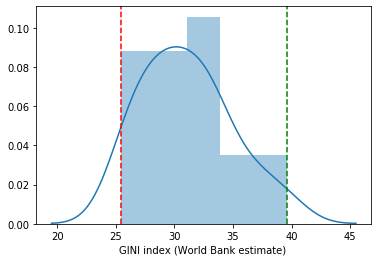

<Figure size 432x288 with 0 Axes>

In [108]:
#Gini index dist plot

sns.distplot(gi_df)
plt.axvline(x=25.4, label = 'Slovenia', color='r',linestyle='--')
plt.axvline(x=39.6, label = 'Serbia', color='g',linestyle='--')
plt.show()
plt.savefig("gini.png")


In [109]:
#Poverty ratio
pov_ratio = ee_df['poverty headcount ratio(% of population)']

for i in range(0,len(pov_ratio)):
    if type(pov_ratio[i]) == str:
        pov_ratio[i] = float(pov_ratio[i].rstrip(" %"))
    else:
        pov_ratio[i] = float(pov_ratio[i])

pd.to_numeric(pov_ratio,errors='coerce')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0      0.143
1      9.700
2     12.600
3      0.300
4      0.200
5     23.900
6     14.300
7      0.700
8     16.300
9     14.900
10    19.500
11    17.600
12     0.086
13    21.800
14    16.900
15    22.100
16    22.500
17     7.000
18    22.200
19    25.500
Name: poverty headcount ratio(% of population), dtype: float64

In [110]:
#Average poverty ratio

pov_ratio.mean().round(2)

13.41

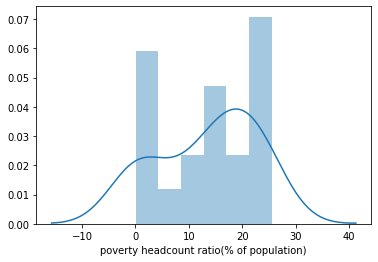

In [111]:
#Distribution of poverty ratio

sns.distplot(pov_ratio, bins=6)
plt.show()

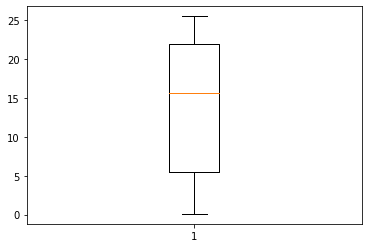

In [112]:
#
plt.boxplot(pov_ratio)
plt.show()

In [113]:
#Add country names to poverty ratio
poverty_ratio = pd.concat([c_codes_df,pov_ratio], axis=1, join='inner')
poverty_ratio.sort_values(by=['poverty headcount ratio(% of population)'])

,Country Code,poverty headcount ratio(% of population)
12,MNE,0.086
0,SVN,0.143
4,NOR,0.2
3,FIN,0.3
7,SWE,0.7
17,GRC,7
1,CZE,9.7
2,SVK,12.6
6,ALB,14.3
9,HUN,14.9


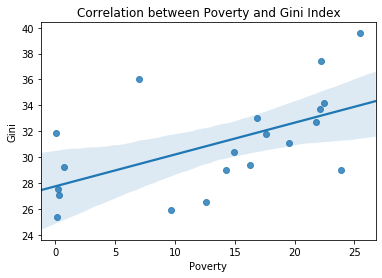

<Figure size 432x288 with 0 Axes>

In [114]:
# Are gini index and poverty ratio correlated?
## create a combined dataframe clean_df
## create regression

clean_df = pd.concat([pov_ratio,gi_df], axis=1, join='inner')
clean_df.columns = ['Poverty','Gini']
clean_df = clean_df.apply(pd.to_numeric)
clean_df
sns.regplot(x='Poverty', y ='Gini', data=clean_df)
plt.title('Correlation between Poverty and Gini Index')
plt.show()
plt.savefig("correlation_poverty_gini.png")

In [115]:
# Calculate the correlation coeficient between Gini and poverty
np.corrcoef(clean_df['Poverty'],clean_df['Gini'])

array([[1.        , 0.57456441],
       [0.57456441, 1.        ]])

In [116]:
#employment in agriculture, industry and services

emp_agr = ee_df['Employment in agriculture (% of total employment) (modeled ILO estimate)']
emp_agr.rename('Agriculture (% of total employment)',inplace=True)

emp_ind = ee_df['Employment in industry (% of total employment) (modeled ILO estimate)']
emp_ind.rename('Industry (% of total employment)',inplace=True)

emp_ser = ee_df['Employment in services (% of total employment) (modeled ILO estimate)']
emp_ser.rename('Services (% of total employment)',inplace=True)

#Add country names and concatenate employment
emp_complete = pd.concat([c_codes_df,emp_agr,emp_ind,emp_ser], axis=1, join='inner')
emp_complete

,Country Code,Agriculture (% of total employment),Industry (% of total employment),Services (% of total employment)
0,SVN,5.562000,33.250000,61.187000
1,CZE,2.803000,38.057999,59.139000
2,SVK,2.708000,37.161999,60.130001
3,FIN,3.763000,22.156000,74.081001
4,NOR,2.063000,19.405001,78.531998
5,XKX,2.260000,28.240000,62.170000
6,ALB,38.203999,19.351999,42.444000
7,SWE,1.830000,18.165001,80.004997
8,MLT,1.015000,19.818001,79.166000
9,HUN,5.037000,31.523001,63.439999


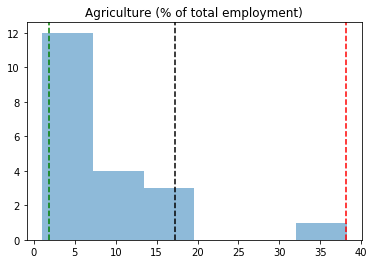

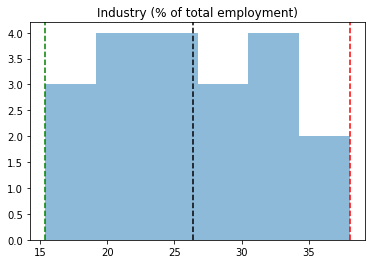

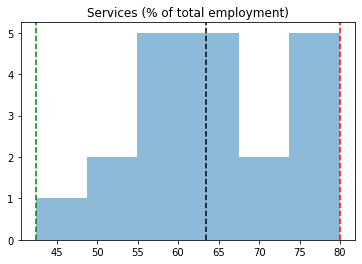

In [117]:
# distributions of employment

plt.hist(emp_agr, bins=6, alpha=0.5)
plt.axvline(x=1.83, label = 'Sweden', color='g',linestyle='--')
plt.axvline(x=38.2, label = 'Albania', color='r',linestyle='--')
plt.axvline(x=17.2, label = 'Serbia', color='k',linestyle='--')
plt.title('Agriculture (% of total employment)')
plt.show()
plt.hist(emp_ind,bins=6, alpha=0.5)
plt.axvline(x=15.41, label = 'Greece', color='g',linestyle='--')
plt.axvline(x=38.06, label = 'Czech', color='r',linestyle='--')
plt.axvline(x=26.42, label = 'Croatia', color='k',linestyle='--')
plt.title('Industry (% of total employment)')
plt.show()
plt.hist(emp_ser,bins=6, alpha=0.5)
plt.axvline(x=80, label = 'Sweden', color='r',linestyle='--')
plt.axvline(x=42.44, label = 'Albania', color='g',linestyle='--')
plt.axvline(x=63.44, label = 'Hungary', color='k',linestyle='--')
plt.title('Services (% of total employment)')
plt.show()

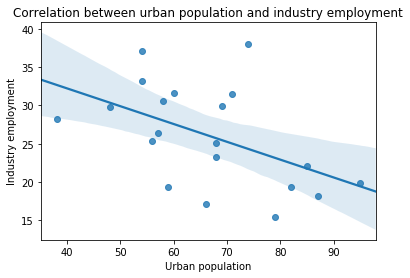

<Figure size 432x288 with 0 Axes>

In [118]:
# Is Urban population more engaged with industry or services?
## create a combined dataframe clean_2_df
## create regression

clean_2_df = pd.concat([urban_pop,emp_ind], axis=1, join='inner')
clean_2_df.columns = ['Urban population','Industry employment']
clean_2_df = clean_2_df.apply(pd.to_numeric)
clean_2_df
sns.regplot(x='Urban population', y ='Industry employment', data=clean_2_df)
plt.title('Correlation between urban population and industry employment')
plt.show()
plt.savefig("correlation_urban_pop_industry_employment.png")

In [119]:
# Calculate the correlation coeficient between urban pop and industry
np.corrcoef(clean_2_df['Urban population'],clean_2_df['Industry employment'])

array([[ 1.        , -0.49952593],
       [-0.49952593,  1.        ]])

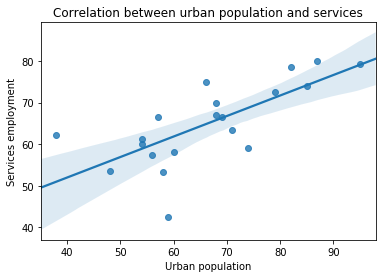

<Figure size 432x288 with 0 Axes>

In [120]:
# Is Urban population more engaged with industry or services?
## create a combined dataframe clean_3_df
## create regression

clean_3_df = pd.concat([urban_pop,emp_ser], axis=1, join='inner')
clean_3_df.columns = ['Urban population','Services employment']
clean_3_df = clean_3_df.apply(pd.to_numeric)
clean_3_df
sns.regplot(x='Urban population', y ='Services employment', data=clean_3_df)
plt.title('Correlation between urban population and services')
plt.show()
plt.savefig("correlation_urban_pop_services.png")

In [121]:
# Calculate the correlation coeficient between urban pop and services
np.corrcoef(clean_3_df['Urban population'],clean_3_df['Services employment'])

array([[1.        , 0.71604318],
       [0.71604318, 1.        ]])

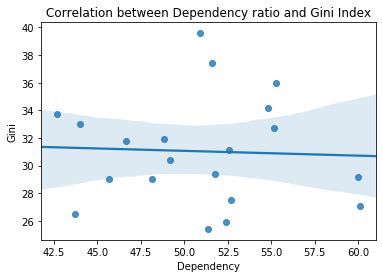

<Figure size 432x288 with 0 Axes>

In [122]:
# Are gini index and dependency ratio correlated?
## create a combined dataframe clean_4_df
## create regression

clean_4_df = pd.concat([age_dep,gi_df], axis=1, join='inner')
clean_4_df.columns = ['Dependency','Gini']
clean_4_df = clean_4_df.apply(pd.to_numeric)
clean_4_df
sns.regplot(x='Dependency', y ='Gini', data=clean_4_df)
plt.title('Correlation between Dependency ratio and Gini Index')
plt.show()
plt.savefig("correlation_dependency_gini.png")

In [123]:
# Calculate the correlation coeficient between dependency and gini
np.corrcoef(clean_4_df['Dependency'],clean_4_df['Gini'])

array([[ 1.        , -0.04387862],
       [-0.04387862,  1.        ]])

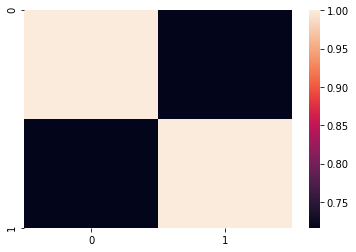

In [124]:
#Heatmap example

sns.heatmap(np.corrcoef(clean_3_df['Urban population'],clean_3_df['Services employment']))

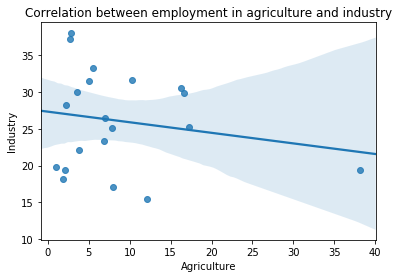

<Figure size 432x288 with 0 Axes>

In [125]:
#What is the employment dynamic between industry and agriculture?

clean_5_df = pd.concat([emp_agr,emp_ind], axis=1, join='inner')
clean_5_df.columns = ['Agriculture','Industry']
clean_5_df = clean_5_df.apply(pd.to_numeric)
clean_5_df
sns.regplot(x='Agriculture', y ='Industry', data=clean_5_df)
plt.title('Correlation between employment in agriculture and industry')
plt.show()
plt.savefig("correlation_agric_ind.png")


In [126]:
#Correlation between Industry and agriculture

np.corrcoef(clean_5_df['Industry'],clean_5_df['Agriculture'])

array([[ 1.       , -0.1862679],
       [-0.1862679,  1.       ]])

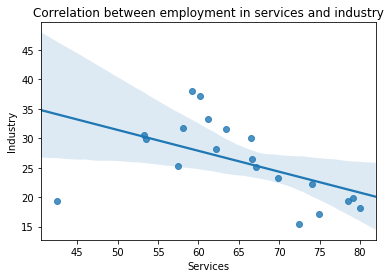

<Figure size 432x288 with 0 Axes>

In [127]:
#What is the employment dynamic between industry and services?

clean_6_df = pd.concat([emp_ser,emp_ind], axis=1, join='inner')
clean_6_df.columns = ['Services','Industry']
clean_6_df = clean_6_df.apply(pd.to_numeric)
clean_6_df
sns.regplot(x='Services', y ='Industry', data=clean_6_df)
plt.title('Correlation between employment in services and industry')
plt.show()
plt.savefig("correlation_serv_ind.png")



In [128]:
#What is the employment dynamic between industry and services?

np.corrcoef(clean_2_df['Industry employment'],clean_3_df['Services employment'])


array([[ 1.       , -0.5251145],
       [-0.5251145,  1.       ]])

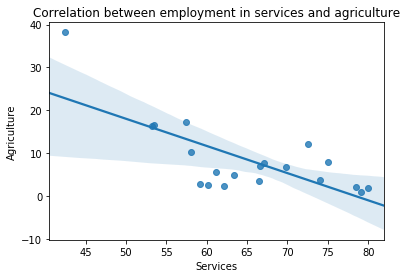

<Figure size 432x288 with 0 Axes>

In [129]:
#What is the employment dynamic between agriculture and services?

clean_7_df = pd.concat([emp_ser,emp_agr], axis=1, join='inner')
clean_7_df.columns = ['Services','Agriculture']
clean_7_df = clean_7_df.apply(pd.to_numeric)
clean_7_df
sns.regplot(x='Services', y ='Agriculture', data=clean_7_df)
plt.title('Correlation between employment in services and agriculture')
plt.show()
plt.savefig("correlation_serv_agric.png")


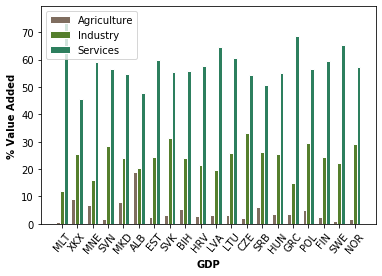

In [130]:
#bar graph comparing industry dominance in Eastern Europe
barWidth = 0.25
Agriculture = [0.79, 9.13, 6.84, 1.71, 7.88, 19.01, 2.32, 3.09, 5.60, 3.01, 3.19, 3.11, 2.05, 6.02, 3.75, 3.70, 5.21, 2.34, 1.06, 1.92]
Industry = [11.98, 25.56, 15.89, 28.52, 24.13, 20.38, 24.44, 31.42, 23.91, 21.65, 19.73, 26.04, 33.22, 26.09, 25.63, 15.04, 29.60, 24.38, 22.18, 29.25]
Services = [75.67, 45.80, 59.11, 56.67, 54.62, 47.97, 59.95, 55.56, 55.78, 57.81, 64.48, 60.72, 54.46, 50.89, 55.24, 68.67, 56.40, 59.62, 65.19, 57.47]

bars= ['MLT', 'XKX', 'MNE', 'SVN', 'MKD', 'ALB', 'EST', 'SVK', 'BIH', 'HRV', 'LVA', 'LTU', 'CZE', 'SRB', 'HUN', 'GRC', 'POL', 'FIN', 'SWE', 'NOR']

r1 = np.arange(len(bars))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, Agriculture, color='#7f6d5f', width=barWidth, edgecolor='white', label='Agriculture')
plt.bar(r2, Industry, color='#557f2d', width=barWidth, edgecolor='white', label='Industry')
plt.bar(r3, Services, color='#2d7f5e', width=barWidth, edgecolor='white', label='Services')
plt.xlabel('GDP', fontweight='bold')
plt.ylabel('% Value Added', fontweight='bold')
plt.xticks([r + barWidth 
            for r in range
                (len(bars))], ['MLT', 'XKX', 'MNE', 'SVN', 'MKD', 'ALB', 'EST', 'SVK', 'BIH', 'HRV', 'LVA', 'LTU', 'CZE', 'SRB', 'HUN', 'GRC', 'POL', 'FIN', 'SWE', 'NOR'])
plt.xticks(rotation = 50)

plt.legend()
plt.show()

# Employment

In [131]:
#employment in agriculture
em_agriculture=ee_df['Employment in agriculture (% of total employment) (modeled ILO estimate)']
em_agriculture

#Add country code to employment in agriculture
c_codes_df = ee_df.loc[:,['Country Code']]
em_agriculture_complete = pd.concat([c_codes_df,em_agriculture], axis=1, join='inner')
em_agriculture_complete

,Country Code,Agriculture (% of total employment)
0,SVN,5.562000
1,CZE,2.803000
2,SVK,2.708000
3,FIN,3.763000
4,NOR,2.063000
5,XKX,2.260000
6,ALB,38.203999
7,SWE,1.830000
8,MLT,1.015000
9,HUN,5.037000


In [132]:
#Descriptive statistics from employment in agriculture
em_agriculture.describe()

count    20.000000
mean      8.537200
std       8.647654
min       1.015000
25%       2.779250
50%       6.215000
75%      10.686750
max      38.203999
Name: Agriculture (% of total employment), dtype: float64

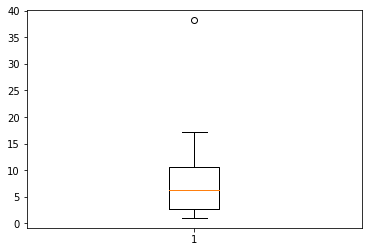

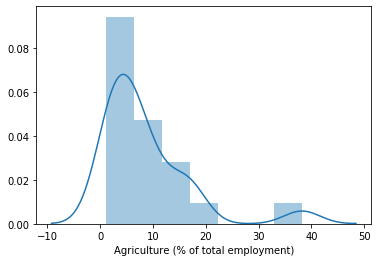

In [133]:
#Employment in agriculture boxplot
plt.boxplot(em_agriculture)
plt.show()
#Employment in agriculture distributions
sns.distplot(em_agriculture)
plt.show()

In [134]:
#Employment in industry
em_industry=ee_df['Employment in industry (% of total employment) (modeled ILO estimate)']
em_industry

#Add country code to employment in industry
c_codes_df = ee_df.loc[:,['Country Code']]
em_industry_complete = pd.concat([c_codes_df,em_industry], axis=1, join='inner')
em_industry_complete

,Country Code,Industry (% of total employment)
0,SVN,33.250000
1,CZE,38.057999
2,SVK,37.161999
3,FIN,22.156000
4,NOR,19.405001
5,XKX,28.240000
6,ALB,19.351999
7,SWE,18.165001
8,MLT,19.818001
9,HUN,31.523001


In [135]:
#Descriptive statistics from employment in industry
em_industry.describe()

count    20.000000
mean     26.091250
std       6.664203
min      15.408000
25%      19.714751
50%      25.857000
75%      30.794001
max      38.057999
Name: Industry (% of total employment), dtype: float64

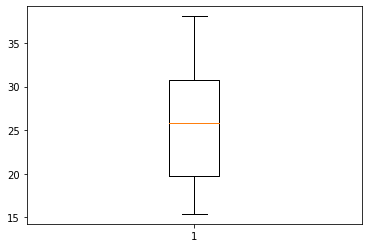

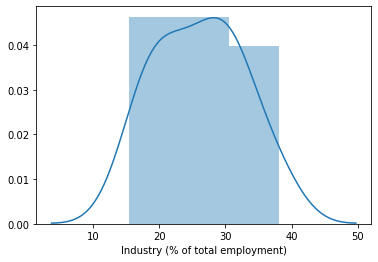

In [136]:
#Employment in industry boxplot
plt.boxplot(em_industry)
plt.show()

#Employment in industry distributions
sns.distplot(em_industry)
plt.show()

In [137]:
#Employment in services (% of total employment) (modeled ILO estimate)
em_services=ee_df['Employment in services (% of total employment) (modeled ILO estimate)']
#Add country code to employment in industry
c_codes_df = ee_df.loc[:,['Country Code']]
em_services_complete = pd.concat([c_codes_df,em_services], axis=1, join='inner')
em_services_complete

,Country Code,Services (% of total employment)
0,SVN,61.187000
1,CZE,59.139000
2,SVK,60.130001
3,FIN,74.081001
4,NOR,78.531998
5,XKX,62.170000
6,ALB,42.444000
7,SWE,80.004997
8,MLT,79.166000
9,HUN,63.439999


In [138]:
#Descriptive statistics from employment in services
em_services.describe()

count    20.000000
mean     65.005000
std       9.860088
min      42.444000
25%      58.882250
50%      64.975000
75%      72.903502
max      80.004997
Name: Services (% of total employment), dtype: float64

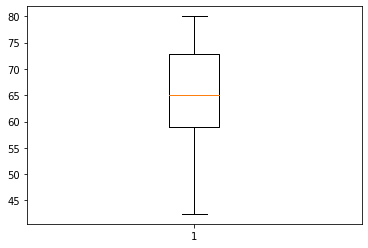

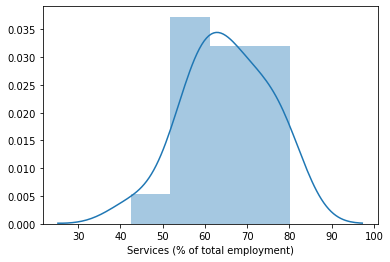

In [139]:
#Employment in services boxplot
plt.boxplot(em_services)
plt.show()

#Employment in services distributions
sns.distplot(em_services)
plt.show()

In [140]:
#Average field of employment in eastern europe
print(em_agriculture.mean())
print(em_industry.mean())
print(em_services.mean())

8.53719995069504
26.091250097274774
65.00500039672852


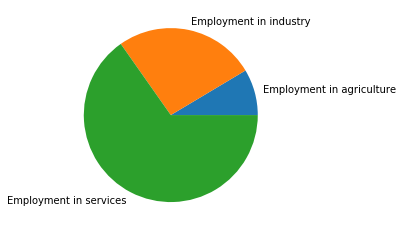

In [141]:
#Pie chart of employment in eastern europe
labels='Employment in agriculture','Employment in industry','Employment in services'
fraces=[em_agriculture.mean(),em_industry.mean(),em_services.mean()]
plt.pie(x=fraces,labels=labels)
plt.show()

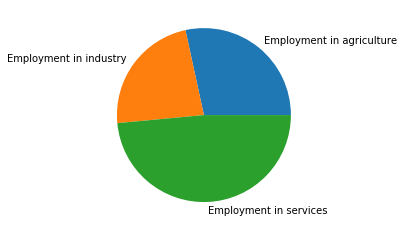

In [142]:
#Pie chart of employment in the world
df = pd.read_excel('WDIW Dataset_Team 2.xlsx',sheet_name=0)
w_df=df.loc[86]
w_em_agriculture=w_df['Employment in agriculture (% of total employment) (modeled ILO estimate)']
w_em_industry=w_df['Employment in industry (% of total employment) (modeled ILO estimate)']
w_em_services=w_df['Employment in services (% of total employment) (modeled ILO estimate)']
labels='Employment in agriculture','Employment in industry','Employment in services'
fraces=[w_em_agriculture,w_em_industry,w_em_services]
plt.pie(x=fraces,labels=labels)
plt.show()

### The End ###